# Using Keras_ocr to extract images 

In [4]:
# ! pip install keras_ocr
# ! pip install tensorflow
# ! pip install pandas
# ! pip install numpy
# ! pip install matplotlib
# ! pip install glob2

  Preparing metadata (setup.py) ... done
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9301 sha256=57dae762ff0f1d5dbb00a8cdfc39dfb4a5d5caac5d463bd8fe76bc9f08c7f5de
  Stored in directory: /home/jamie/.cache/pip/wheels/37/07/ce/cbe8d31ad93224571b49fa03f8a5da11cdb31d3845ff73e0f3
Successfully built glob2


In [1]:
import keras_ocr 
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

pipeline = keras_ocr.pipeline.Pipeline()

2023-09-05 10:52:02.736441: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-05 10:52:02.822352: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 10:52:03.302608: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 10:52:03.306717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 10:52:04.998390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Looking for /home/jamie/.keras-ocr/craft_mlt_25k.h5
Looking for /home/jamie/.keras-ocr/crnn_kurapan.h5


In [17]:
# Find all images
image_fns = glob("raw_data/photos/movies_train/*")
print(len(image_fns))
image_fns[:5]

5000


True

In [19]:
# Get image and run through keras_ocr
current_image = image_fns[2542]
results = pipeline.recognize([current_image])

# Make df of all words in image
text_df = pd.DataFrame(results[0], columns=["text", "bbox"])
text_df.shape

4/4 [==============================] - 5s 837ms/step


(103, 2)

In [20]:
# Functions for bbox
def getInfo(x1, y1, x2, y2):
    return x1*y2 - y1*x2

# Solve for biggest bbox in image
def solve(points):
    N = len(points)
    firstx, firsty = points[0]
    prevx, prevy = firstx, firsty
    res = 0

    for i in range(1, N):
        nextx, nexty = points[i]
        res = res + getInfo(prevx,prevy,nextx,nexty)
        prevx = nextx
        prevy = nexty
    res = res + getInfo(prevx,prevy,firstx,firsty)
    return abs(res)/2.0

<Axes: >

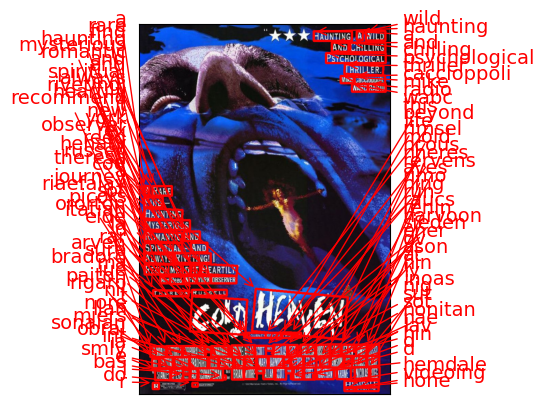

In [21]:
keras_ocr.tools.drawAnnotations(plt.imread(current_image), results[0])